# Tarea N°02

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Diego Nicolás Hipólito Mera Muñoz

* __Rol__: 201511502-8

2.- Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
    
%matplotlib inline

In [112]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [113]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [114]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [115]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

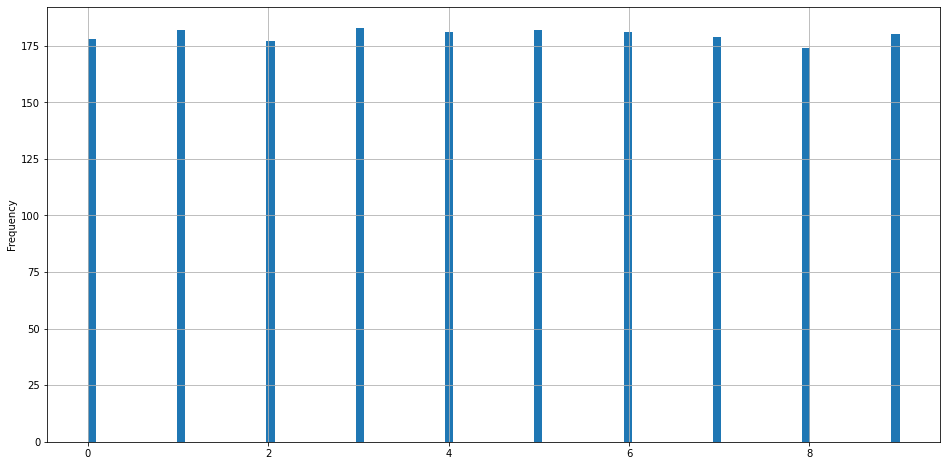

In [11]:
plt.figure(figsize=(16, 8))
digits['target'].plot.hist(bins= 100)
plt.grid()
plt.show()

* Realizando un histograma de los 'target', apreciamos que existe una distribución bastante equitativa en cuanto a cantidad de muestras para cada dígito.

In [6]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int32
 1   c01     1797 non-null   int32
 2   c02     1797 non-null   int32
 3   c03     1797 non-null   int32
 4   c04     1797 non-null   int32
 5   c05     1797 non-null   int32
 6   c06     1797 non-null   int32
 7   c07     1797 non-null   int32
 8   c08     1797 non-null   int32
 9   c09     1797 non-null   int32
 10  c10     1797 non-null   int32
 11  c11     1797 non-null   int32
 12  c12     1797 non-null   int32
 13  c13     1797 non-null   int32
 14  c14     1797 non-null   int32
 15  c15     1797 non-null   int32
 16  c16     1797 non-null   int32
 17  c17     1797 non-null   int32
 18  c18     1797 non-null   int32
 19  c19     1797 non-null   int32
 20  c20     1797 non-null   int32
 21  c21     1797 non-null   int32
 22  c22     1797 non-null   int32
 23  c23     1797 

- Gracias al uso del comando .info() podemos saber que los datos no presentan valores nulos, se trata de datos tipo int32 y que el uso de memoria es de 456.4 KB.

In [7]:
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


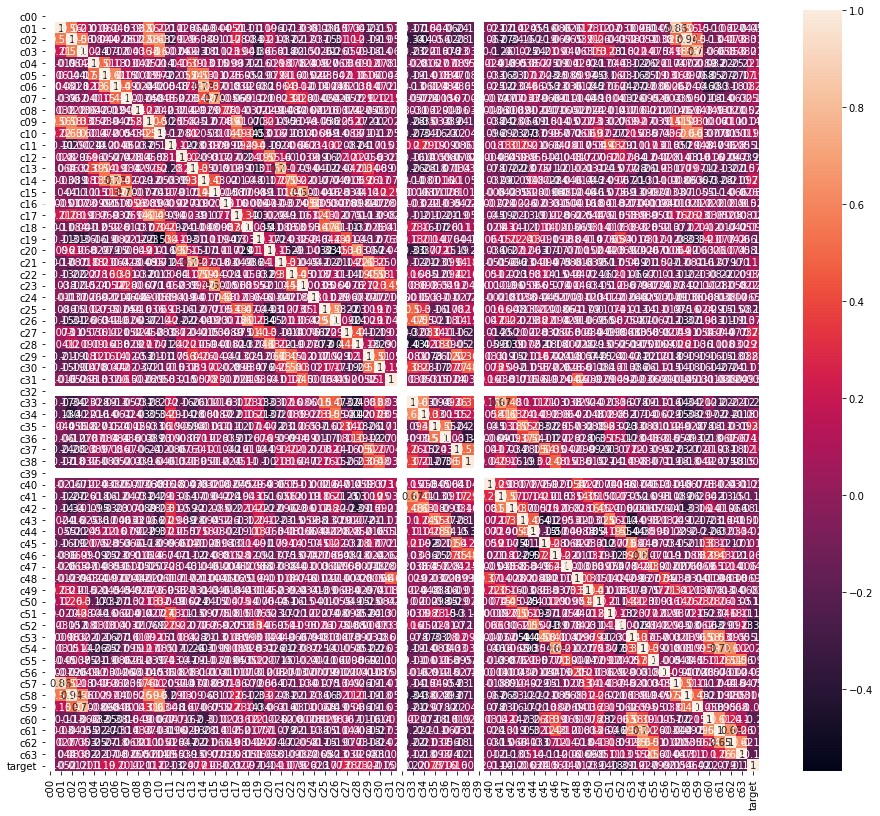

In [8]:
# Para revisar la correlación se trabaja con un mapa de calor a través de seaborn. 
# Se utiliza el método de correlación de pearson.

corr_df = digits.corr(method='pearson')
plt.figure(figsize=(16, 14))
sns.heatmap(corr_df, annot=True)
plt.show()

* El mapa de calor es una forma de representar los datos en una forma bidimensional. Los valores de los datos son representados como colores en el gráfico. La meta del mapa de calor es proporcionar un resumen visual a color de la información. En esta ocasión, lo que se muestra es la correlación entre los datos del conjunto de datos. No se aprecian correlaciones significativas fuera de la diagonal

In [9]:
digits.isnull().any().describe()

count        65
unique        1
top       False
freq         65
dtype: object

- Se revisa la existencia de valores nulos en el dataframe. Se aprecia que no existe ninguno, por tanto, podemos proceder sin problemas.

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [8]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

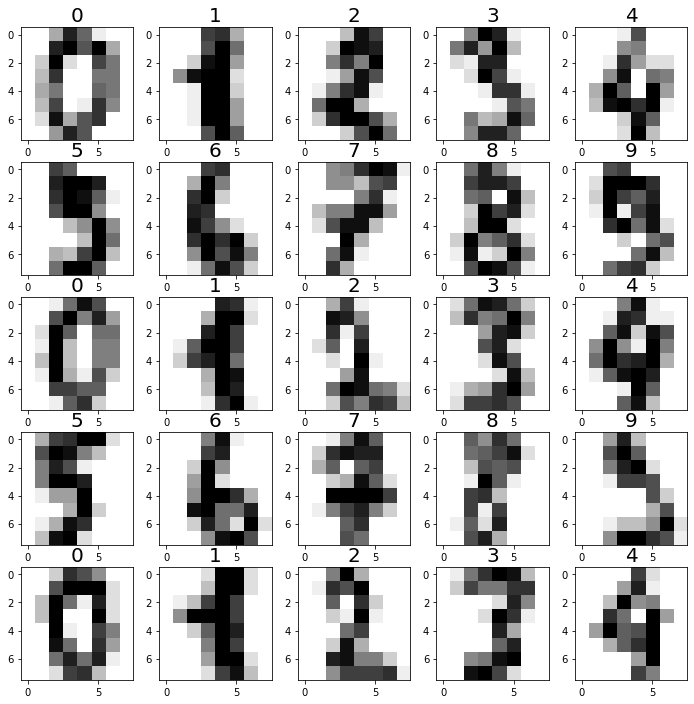

In [12]:
groups = range(1, 25 + 1)
aux = digits['target'].to_numpy()
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i, ax in zip(groups, axs.ravel()):
    ax.imshow(digits.iloc[i-1,:-1].to_numpy().reshape((8, 8, 1)), cmap='binary')
    ax.set_title(f"Grupo {i-1}")
    ax.set_title(aux[i-1],size = 20)

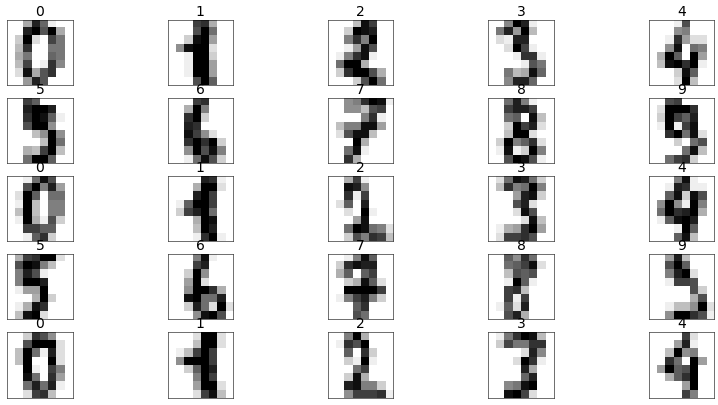

In [13]:
# Se puede realizar lo mismo con plt.

plt.rcParams['figure.dpi'] = 50
plt.figure(figsize=(20, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(digits.iloc[i,:-1].to_numpy().reshape((8, 8, 1)), cmap='binary')
    plt.title(digits['target'][i],size = 20)
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [42]:
X = digits.drop(columns="target").values
y = digits["target"].values

**Train Test**

In [11]:
# Crear conjunto de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  1797
numero de filas train set     :  1437
numero de filas test set      :  360


**Modelo**

In [12]:
# Se separa en data sets de testeo y de entrenamiento.
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=1)
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

def summary_metrics(ytest,xtest,model,name) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true =  list(ytest)
    y_pred = list(model.predict(xtest))
    
    matrix = confusion_matrix(y_true,y_pred)

    df_result['accuracy'] = [round(accuracy_score(y_true,y_pred),4)]
    df_result['recall'] = [round(recall_score(y_true,y_pred, average="macro"),4)]
    df_result['precision'] = [round(precision_score(y_true,y_pred, average="macro"),4)]
    df_result['fscore'] = [round(f1_score(y_true,y_pred, average="macro"),4)]
    df_result['Model'] = name

    return df_result,matrix

# Se genera una función para evaluar el modelo en base a las métricas que van de 0 a 1.
frames = []
Matriz = []
def model_evaluate(model,name):
    model.fit(xtrain,ytrain)
    [df,matrix] = summary_metrics(ytest,xtest,model,name)
    frames.append(df)
    Matriz.append(matrix.tolist())
    
# Lista de modelos a probar.
lr=LogisticRegression(solver='liblinear')
svm=SVC()
dt=DecisionTreeClassifier(max_depth=100)
rf=RandomForestClassifier(max_samples=0.9)
knn=KNeighborsClassifier(n_neighbors=5)

models=[lr,svm,dt,rf,knn]
names = ["Logistic Prev","RBF SVM Prev","Decision Tree Prev","Random Forest Prev","KNeighbors Prev"]

# Evaluación de los modelos.
for i in range(5):
    model_evaluate(models[i],names[i])

result_prev = pd.concat(frames, sort='False', ignore_index='True')
result_prev

,Model,accuracy,fscore,precision,recall
0,Logistic Prev,0.9722,0.9699,0.9702,0.9705
1,RBF SVM Prev,0.9833,0.9823,0.9844,0.9814
2,Decision Tree Prev,0.8667,0.8644,0.8642,0.8674
3,Random Forest Prev,0.9778,0.9772,0.9766,0.9784
4,KNeighbors Prev,0.9778,0.9771,0.9791,0.9759


In [15]:
for i in range(5):
    texto = names[i]
    print("Matriz de Confusión Método ", end=f"{texto}")
    print('\n')
    print(np.asarray(Matriz[0]))
    print('\n')

Matriz de Confusión Método Logistic Prev

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  1  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  2  0  0 34  0  1]
 [ 0  0  0  0  0  1  0  0 27  1]
 [ 0  0  0  0  0  1  0  0  1 32]]


Matriz de Confusión Método RBF SVM Prev

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  1  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  2  0  0 34  0  1]
 [ 0  0  0  0  0  1  0  0 27  1]
 [ 0  0  0  0  0  1  0  0  1 32]]


Matriz de Confusión Método Decision Tree Prev

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  1  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  

**Mejor estimación de los parámetros para LogisticRegression**

* Esto toma tiempo, para los ajustes próximos se va a trabajar con menos hiperparámetros
* Ciertas combinaciones de hiperparámetros que se evaluán no son posibles, esto aparece como warning en la ejecución e indica cuantas combinaciones no fue posible realizar

In [13]:
from sklearn.pipeline import Pipeline
import time
inicio = time.time()

name = "Logistic"
# Determinar los parámetros a variar
#tuned_parameters = {'C': [0.001,0.01,0.1,1,10,100,1000]}

pipe = Pipeline([('scale', StandardScaler()),
    ('mnl', LogisticRegression(fit_intercept=True, multi_class="multinomial"))])

param_grid = [{'mnl__solver': ['newton-cg', 'lbfgs','sag', 'saga','liblinear'],
               'mnl__C':[0.001,0.01,0.1,1,10,100,1000],
               'mnl__class_weight':[None,'balanced'],
              'mnl__max_iter':[1000,2000,3000],
              'mnl__penalty':['l1','l2']}]

# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
clf = GridSearchCV(estimator = pipe, param_grid=param_grid, scoring='accuracy', n_jobs=-1, refit='neg_log_loss', cv=3, verbose=2, return_train_score=True)

# Ajustar el modelo a los datos de entrenamiento
best_model = clf.fit(xtrain, ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(clf.best_params_)

# Métricas y Matriz de confusión
[df_1,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_1)
print("")

fin = time.time()
t1 = fin-inicio
print(t1) 

Fitting 3 folds for each of 420 candidates, totalling 1260 fits

Los mejores parámetros encontrados son:
 
{'mnl__C': 1, 'mnl__class_weight': None, 'mnl__max_iter': 1000, 'mnl__penalty': 'l2', 'mnl__solver': 'newton-cg'}

Matriz de confusion:
 
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  1]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  1  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  1  0 36  0  0]
 [ 0  0  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  1  0  0  0 33]]

Metricas:
 
   accuracy  recall  precision  fscore     Model
0    0.9833  0.9814     0.9821  0.9817  Logistic

234.83237528800964


C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
630 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
126 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(sel

**Mejor estimación de los parámetros para SVC**

In [14]:
import time
inicio = time.time()

name = "RBF SVM"
# Determinar el rango de C en el que se quiere buscar
Cs = [0.001, 0.01, 0.1 ,1, 10, 100, 1000, 10000]

# Determinar el rango de gammas en el que se quiere buscar
gammas = [0.00000001 ,0.00000001 ,0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1 , 1, 10, 100, 1000]

# Crear el diccionario
param_grid = {'C': Cs, 'gamma': gammas}

# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
grid_search = GridSearchCV(SVC(kernel='poly'),param_grid,cv=3)

# Ajustar el modelo a los datos de entrenamiento
best_model = grid_search.fit(xtrain,ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(grid_search.best_params_)
    
# Métricas y Matriz de confusión
[df_2,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_2)
print("")

fin = time.time()
t2 = fin-inicio
print(t2) 


Los mejores parámetros encontrados son:
 
{'C': 0.001, 'gamma': 1}

Matriz de confusion:
 
[[42  0  0  0  0  0  0  0  1  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  1  1]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  0 34]]

Metricas:
 
   accuracy  recall  precision  fscore    Model
0    0.9889  0.9883      0.988  0.9878  RBF SVM

19.666141986846924


**Mejor estimación de los parámetros para Decision Tree**

In [15]:
import time
inicio = time.time()

name = "Decision Tree"

# Determinar los parámetros a variar
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=3)

# Ajustar el modelo a los datos de entrenamiento
best_model = clf.fit(xtrain, ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(clf.best_params_)

# Métricas y Matriz de confusión
[df_3,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_3)
print("")

fin = time.time()
t3 = fin-inicio
print(t3) 


Los mejores parámetros encontrados son:
 
{'criterion': 'entropy', 'max_depth': 90}

Matriz de confusion:
 
[[41  0  0  0  1  1  0  0  0  0]
 [ 0 31  1  0  1  1  0  0  0  1]
 [ 0  0 33  1  0  0  0  0  0  2]
 [ 0  0  1 37  0  1  0  0  1  1]
 [ 0  1  0  0 35  1  0  1  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  0  0  0  1  1 35  0  0  0]
 [ 0  0  0  3  0  0  0 33  0  1]
 [ 2  0  0  1  0  1  0  0 24  1]
 [ 0  0  0  0  1  2  0  0  0 31]]

Metricas:
 
   accuracy  recall  precision  fscore          Model
0    0.9139  0.9123     0.9174  0.9127  Decision Tree

1.2217791080474854


**Mejor estimación de los parámetros para Random forest**

In [16]:
import time
inicio = time.time()

name = "Random Forest"

# Determinar los parámetros a variar
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)

# Ajustar el modelo a los datos de entrenamiento
best_model = CV_rfc.fit(xtrain, ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(CV_rfc.best_params_)

# Métricas y Matriz de confusión
[df_4,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_4)
print("")

fin = time.time()
t4 = fin-inicio
print(t4) 


Los mejores parámetros encontrados son:
 
{'max_features': 'auto', 'n_estimators': 700}

Matriz de confusion:
 
[[41  0  0  0  2  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  0  0  0 28  1]
 [ 0  0  0  0  0  1  0  0  0 33]]

Metricas:
 
   accuracy  recall  precision  fscore          Model
0    0.9861  0.9863     0.9861  0.9859  Random Forest

12.855980396270752


**Mejor estimación de los parámetros para KNeighbors**

In [17]:
import time
inicio = time.time()

name = "KNeighbors"

# Determinar los parámetros a variar
nFolds = 3
metrics       = ['minkowski','euclidean','manhattan'] 
weights       = ['uniform','distance'] #10.0**np.arange(-5,4)
numNeighbors  = np.arange(5,10)

# Crear el diccionario
param_grid    = dict(metric=metrics,weights=weights,n_neighbors=numNeighbors)

# Iniciar la busqueda utilizando todos los parámetros antes seleccionados
grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=nFolds)

# Ajustar el modelo a los datos de entrenamiento
best_model = grid.fit(xtrain, ytrain)

# Mostrar los mejores parámetros
print('\nLos mejores parámetros encontrados son:\n ')
print(grid.best_params_)

# Métricas y Matriz de confusión
[df_5,matrix] = summary_metrics(ytest,xtest,best_model,name)

print('\nMatriz de confusion:\n ')
print(matrix)

print('\nMetricas:\n ')
print(df_5)
print("")

fin = time.time()
t5 = fin-inicio
print(t5) 


Los mejores parámetros encontrados son:
 
{'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'distance'}

Matriz de confusion:
 
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  1  1  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  1  0  0  0 29  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  1  0  1  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  0 34]]

Metricas:
 
   accuracy  recall  precision  fscore       Model
0    0.9806  0.9789     0.9805  0.9794  KNeighbors

2.3313164710998535


In [18]:
result = pd.concat([df_1,df_2,df_3,df_4,df_5], sort='False', ignore_index='True')
result

,Model,accuracy,fscore,precision,recall
0,Logistic,0.9833,0.9817,0.9821,0.9814
1,RBF SVM,0.9889,0.9878,0.9880,0.9883
2,Decision Tree,0.9139,0.9127,0.9174,0.9123
3,Random Forest,0.9861,0.9859,0.9861,0.9863
4,KNeighbors,0.9806,0.9794,0.9805,0.9789


**Ahora que ya tenemos los resultados previos y los optimizados procedemos a unir y comparar.**

In [19]:
# Unir data frames
result_final = pd.concat([result_prev,result], sort='False', ignore_index='True')
df1 = result_final.iloc[[0,5]]
df2 = result_final.iloc[[1,6]]
df3 = result_final.iloc[[2,7]]
df4 = result_final.iloc[[3,8]]
df5 = result_final.iloc[[4,9]]

**Logistic**

In [20]:
df1.sort_values(['accuracy','precision'],ascending=False)

,Model,accuracy,fscore,precision,recall
5,Logistic,0.9833,0.9817,0.9821,0.9814
0,Logistic Prev,0.9722,0.9699,0.9702,0.9705


**RBF SVM**

In [21]:
df2.sort_values(['accuracy','precision'],ascending=False)

,Model,accuracy,fscore,precision,recall
6,RBF SVM,0.9889,0.9878,0.9880,0.9883
1,RBF SVM Prev,0.9833,0.9823,0.9844,0.9814


**Decision Tree**

In [22]:
df3.sort_values(['accuracy','precision'],ascending=False)

,Model,accuracy,fscore,precision,recall
7,Decision Tree,0.9139,0.9127,0.9174,0.9123
2,Decision Tree Prev,0.8667,0.8644,0.8642,0.8674


**Random Forest**

In [23]:
df4.sort_values(['accuracy','precision'],ascending=False)

,Model,accuracy,fscore,precision,recall
8,Random Forest,0.9861,0.9859,0.9861,0.9863
3,Random Forest Prev,0.9778,0.9772,0.9766,0.9784


**KNeighbors**

In [24]:
df5.sort_values(['accuracy','precision'],ascending=False)

,Model,accuracy,fscore,precision,recall
9,KNeighbors,0.9806,0.9794,0.9805,0.9789
4,KNeighbors Prev,0.9778,0.9771,0.9791,0.9759


**Tiempos de Ejecución**

In [27]:
Tiempo = pd.DataFrame()
Tiempo['Modelo'] = ["Logistic","RBF SVM","Decision Tree","Random Forest","KNeighbors"]
Tiempo['Tiempo [s]']=[t1,t2,t3,t4,t5]
Tiempo.sort_values(['Tiempo [s]'],ascending=False)

,Modelo,Tiempo [s]
0,Logistic Prev,234.832375
1,RBF SVM Prev,19.666142
3,Random Forest Prev,12.855980
4,KNeighbors Prev,2.331316
2,Decision Tree Prev,1.221779


* Los resultados fueron ordenamos en base a la exactitud y la precisión.
    * Se concluye que para todos los modelos fue posible optimizar los hiperparámetros, y por consiguiente, obtener mejores resultados
    * Adicionalmente, se muestran los tiempos, en segundos, necesarios para encontrar los parámetros óptimos. El modelo Logistic es el que presenta el tiempo mayor, siendo casi 12 veces superior al tiempo en segundo lugar. Los otros tiempos son de duración razonable.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [29]:
result_final.sort_values(['accuracy','fscore','precision','recall'],ascending=False)

,Model,accuracy,fscore,precision,recall
6,RBF SVM,0.9889,0.9878,0.9880,0.9883
8,Random Forest,0.9861,0.9859,0.9861,0.9863
1,RBF SVM Prev,0.9833,0.9823,0.9844,0.9814
5,Logistic,0.9833,0.9817,0.9821,0.9814
9,KNeighbors,0.9806,0.9794,0.9805,0.9789
3,Random Forest Prev,0.9778,0.9772,0.9766,0.9784
4,KNeighbors Prev,0.9778,0.9771,0.9791,0.9759
0,Logistic Prev,0.9722,0.9699,0.9702,0.9705
7,Decision Tree,0.9139,0.9127,0.9174,0.9123
2,Decision Tree Prev,0.8667,0.8644,0.8642,0.8674


- Ordenando la tabla resumen con todos los modelos podemos observar que el que mejor resultados entrega es RBF SVM con los parámetros optimizados.

### Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='poly', C=0.001, gamma= 1)
scores = cross_val_score(clf, X, y, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


In [31]:
model = SVC(kernel='poly', C=0.001, gamma= 1)
cv_results = cross_val_score(model, X, y, cv=10)
print('La media del ajuste es de: ',cv_results.mean())
print('La desviación estándar es de: ',cv_results.std())

La media del ajuste es de:  0.9771787709497206
La desviación estándar es de:  0.018527725755168832


### Curva de Validación

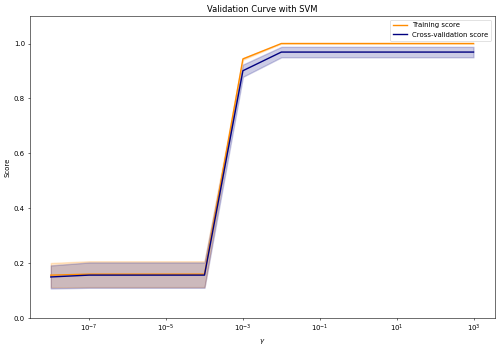

In [32]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve


param_range = [0.00000001 ,0.00000001 ,0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1 , 1, 10, 100, 1000]
train_scores, test_scores = validation_curve(
    SVC(kernel='poly', C=0.001),
    X,
    y,
    param_name="gamma",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=1,
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12, 8)) 
plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

- En este gráfico, se pueden ver los puntajes de entrenamiento y los puntajes de validación de la SVM para diferentes valores del parámetro gamma del kernel. Para valores muy bajos de gamma, puede ver que tanto la puntuación de entrenamiento como la puntuación de validación son bajas. A esto se le llama desajuste. Los valores medios de gamma darán como resultado valores altos para ambas puntuaciones, es decir, el clasificador se está desempeñando bastante bien. Si la gamma es demasiado alta, el clasificador se ajustará en exceso, lo que significa que la puntuación de entrenamiento es buena pero la puntuación de validación es mala.

### Curva AUC–ROC
#### Con Ruido

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Cargar data
X = digits.drop(columns="target").values
y = digits["target"].values

# Binarizar el output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Se le agrega ruido al data set
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Se generan los conjuntos de datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Aprende a predecir cada clase contra la otra
classifier = OneVsRestClassifier(
    svm.SVC(kernel='poly', C=0.001, gamma= 1)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Calcule la curva ROC y el área ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular la curva ROC de micropromedio y el área ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

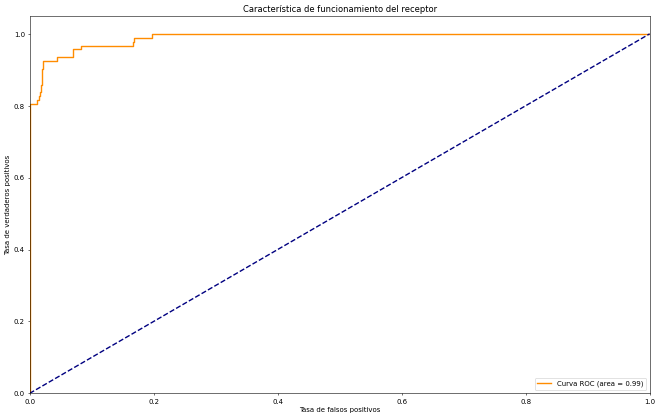

In [46]:
plt.figure(figsize=(16, 10))
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="Curva ROC (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Característica de funcionamiento del receptor")
plt.legend(loc="lower right")
plt.show()

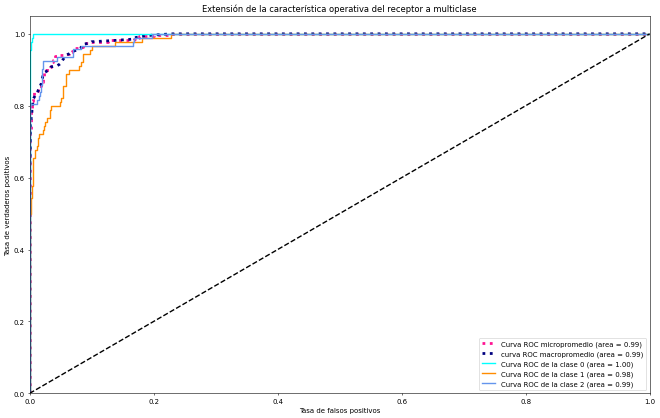

In [47]:
# Primero se agregan todas las tasas de falsos positivos
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Luego interpolar todas las curvas ROC en estos puntos
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finalmente se calcula el promedio y el AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Gráficar todas las curvas ROC
plt.figure(figsize=(16, 10)) 
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="Curva ROC micropromedio (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="curva ROC macropromedio (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="Curva ROC de la clase {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Extensión de la característica operativa del receptor a multiclase")
plt.legend(loc="lower right")
plt.show()

#### Sin ruido

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Cargar data
X = digits.drop(columns="target").values
y = digits["target"].values

# Binarizar el output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Se generan los conjuntos de datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Aprende a predecir cada clase contra la otra
classifier = OneVsRestClassifier(
    svm.SVC(kernel='poly', C=0.001, gamma= 1)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Calcule la curva ROC y el área ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular la curva ROC de micropromedio y el área ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

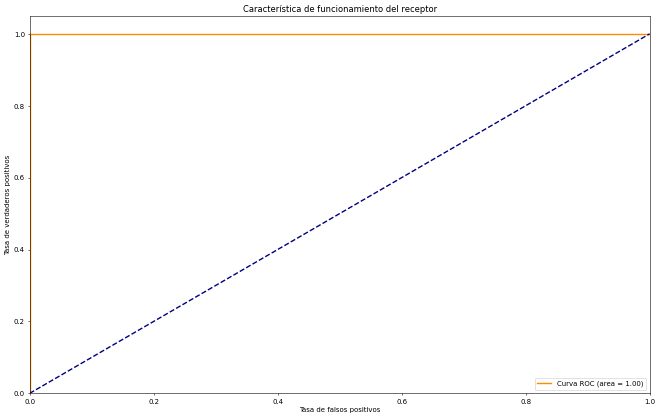

In [51]:
plt.figure(figsize=(16, 10))
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="Curva ROC (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Característica de funcionamiento del receptor")
plt.legend(loc="lower right")
plt.show()

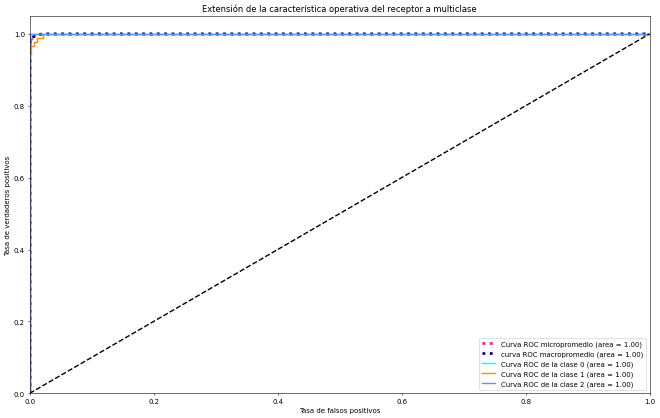

In [52]:
# Primero se agregan todas las tasas de falsos positivos
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Luego interpolar todas las curvas ROC en estos puntos
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finalmente se calcula el promedio y el AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Gráficar todas las curvas ROC
plt.figure(figsize=(16, 10)) 
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="Curva ROC micropromedio (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="curva ROC macropromedio (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="Curva ROC de la clase {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Extensión de la característica operativa del receptor a multiclase")
plt.legend(loc="lower right")
plt.show()

* Las curvas ROC suelen presentar una tasa de verdaderos positivos en el eje Y y una tasa de falsos positivos en el eje X. Esto significa que la esquina superior izquierda de la gráfica es el punto "ideal": una tasa de falsos positivos de cero y una tasa de verdaderos positivos de uno. Esto no es muy realista, pero significa que un área más grande bajo la curva (AUC) suele ser mejor.
    * Este punto en la esquina superior izquierda es obtenido con gran precisión para nuestro caso de estudio cuando no se agrega ruido a la medición, esta ya que se seleccionó el mejor modelo con los parámetros ajustados.
    * Se decidio añadir ruido para darle mayor realismo y complejidad.
* La "inclinación" de las curvas ROC también es importante, ya que es ideal para maximizar la tasa de verdaderos positivos y minimizar la tasa de falsos positivos.
* Las curvas ROC se utilizan normalmente en la clasificación binaria para estudiar la salida de un clasificador. Para extender la curva ROC y el área ROC a la clasificación de etiquetas múltiples, es necesario binarizar la salida. Se puede dibujar una curva ROC por etiqueta, pero también se puede dibujar una curva ROC considerando cada elemento de la matriz del indicador de etiqueta como una predicción binaria (micropromedio).

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [116]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline

dataframe = digits.drop(['target'], axis=1)

# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(dataframe)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Se combierte el array a dataframe para añadir nombres a los ejes.
pca = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = dataframe.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9','PC10',
              'PC11', 'PC12', 'PC13', 'PC14','PC15', 'PC16', 'PC17', 'PC18','PC19','PC20',
              'PC21', 'PC22', 'PC23', 'PC24','PC25', 'PC26', 'PC27', 'PC28','PC29','PC30',
              'PC31', 'PC32', 'PC33', 'PC34','PC35', 'PC36', 'PC37', 'PC38','PC39','PC40',
              'PC41', 'PC42', 'PC43', 'PC44','PC45', 'PC46', 'PC47', 'PC48','PC49','PC50',
              'PC51', 'PC52', 'PC53', 'PC54','PC55', 'PC56', 'PC57', 'PC58','PC59','PC60',
              'PC61', 'PC62', 'PC63', 'PC64']
)
pca.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63
PC1,1.214827e-18,-0.182234,-0.285868,-0.220370,0.025170,0.009497,0.052476,0.062695,-0.034707,-0.245534,...,-0.121247,-0.048771,0.001836,-0.160396,-0.279853,-0.194449,-0.017774,-0.103198,-0.119811,-0.071494
PC2,-7.624335e-19,0.047027,0.059565,-0.020804,0.155903,0.274133,0.249733,0.145832,-0.001027,0.027619,...,-0.257752,-0.115002,0.004883,0.044498,0.081400,-0.009905,-0.251934,-0.242618,-0.165089,-0.071329
PC3,-3.568802e-18,0.023588,-0.056799,-0.040464,-0.067065,-0.091090,-0.037578,-0.022546,0.002813,-0.050642,...,-0.023179,0.102993,0.011547,0.033895,-0.051273,-0.083464,-0.062455,-0.022280,0.100366,0.092446
PC4,2.384224e-18,0.178153,0.156129,0.167800,-0.000009,-0.000519,0.043699,0.008749,0.014401,0.124042,...,-0.157440,-0.130346,0.007788,0.186418,0.165488,0.171490,-0.154438,-0.252432,-0.160720,-0.118180
PC5,-4.198298e-19,-0.029978,-0.014666,0.043716,-0.139993,0.007988,0.211222,0.281818,-0.000631,0.006788,...,0.192448,0.248962,-0.051238,-0.039182,-0.033454,0.100375,-0.003774,0.094738,0.244026,0.231705


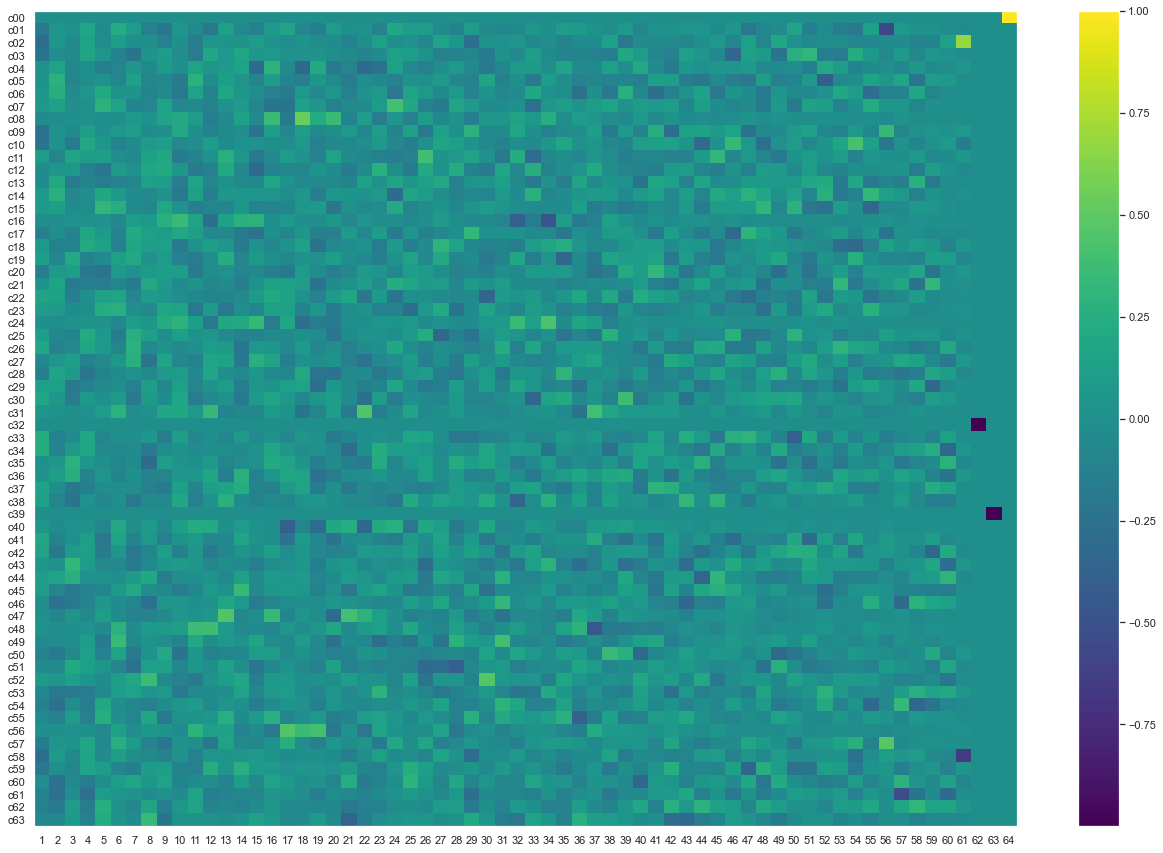

In [117]:
# Heatmap componentes
# ==============================================================================
plt.figure(figsize=(22,15))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dataframe.columns)), dataframe.columns)
plt.xticks(range(len(dataframe.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

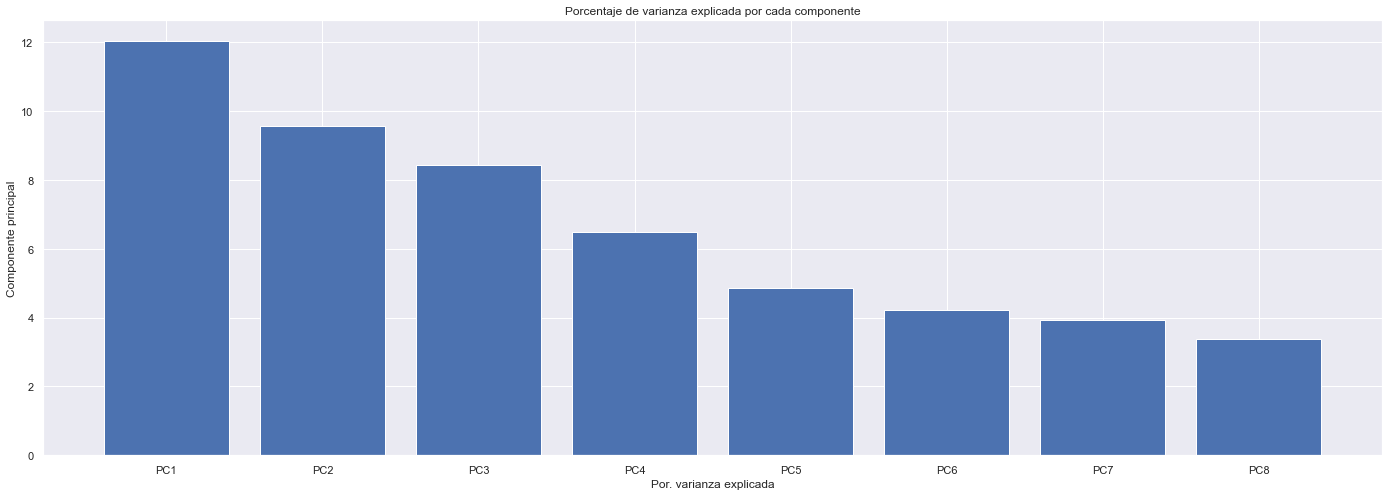

In [118]:
# graficar varianza por componente
cant = 8 # Cantidad de gráficos de barra que se desean mostrar (El total es de 64)
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9','PC10',
              'PC11', 'PC12', 'PC13', 'PC14','PC15', 'PC16', 'PC17', 'PC18','PC19','PC20',
              'PC21', 'PC22', 'PC23', 'PC24','PC25', 'PC26', 'PC27', 'PC28','PC29','PC30',
              'PC31', 'PC32', 'PC33', 'PC34','PC35', 'PC36', 'PC37', 'PC38','PC39','PC40',
              'PC41', 'PC42', 'PC43', 'PC44','PC45', 'PC46', 'PC47', 'PC48','PC49','PC50',
              'PC51', 'PC52', 'PC53', 'PC54','PC55', 'PC56', 'PC57', 'PC58','PC59','PC60',
              'PC61', 'PC62', 'PC63', 'PC64']

plt.figure(figsize=(24,8))
plt.bar(x= range(1,cant+1), height=percent_variance[0:cant], tick_label=columns[0:cant])
plt.xticks(np.arange(cant) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

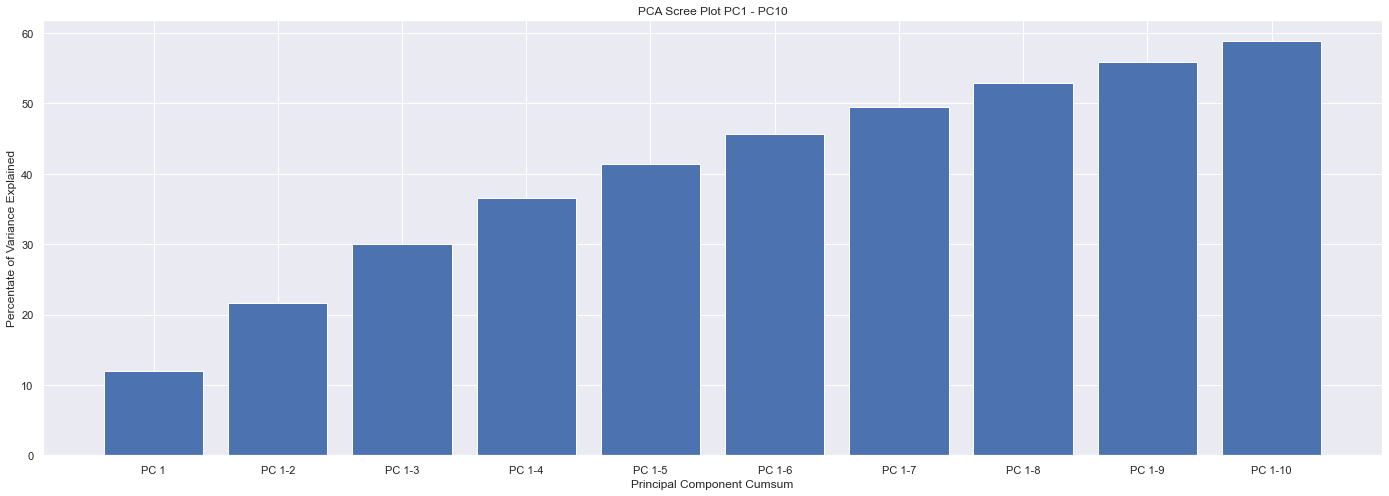

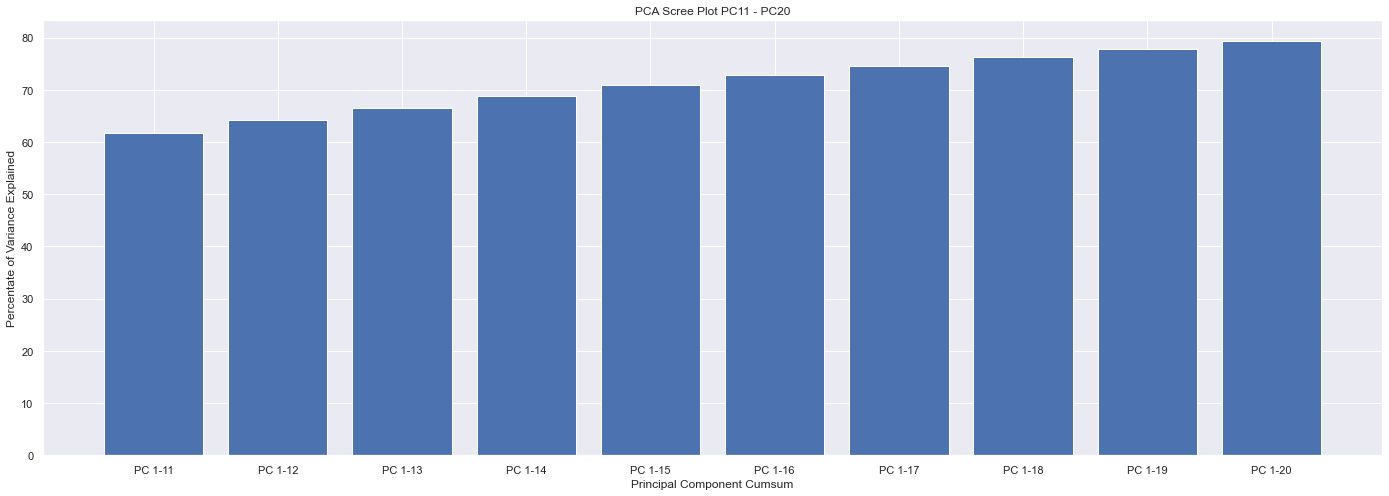

Las probabilidades acumuladas son: 

[ 12.03  21.59  30.03  36.53  41.39  45.6   49.54  52.93  55.93  58.86
  61.64  64.22  66.5   68.73  70.9   72.81  74.59  76.23  77.83  79.32
  80.67  81.94  83.11  84.17  85.15  86.09  86.95  87.79  88.59  89.34
  90.07  90.76  91.41  92.05  92.64  93.21  93.73  94.21  94.66  95.08
  95.49  95.89  96.25  96.59  96.92  97.23  97.52  97.8   98.06  98.29
  98.51  98.71  98.91  99.09  99.26  99.42  99.57  99.71  99.84  99.94
 100.02 100.02 100.02 100.02]


In [119]:
# graficar varianza por la suma acumulada de los componente

percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC 1', 'PC 1-2', 'PC 1-3','PC 1-4','PC 1-5','PC 1-6','PC 1-7','PC 1-8','PC 1-9','PC 1-10',
          'PC 1-11','PC 1-12', 'PC 1-13','PC 1-14','PC 1-15','PC 1-16','PC 1-17','PC 1-18','PC 1-19','PC 1-20',
          'PC 1-21','PC 1-22', 'PC 1-23','PC 1-24','PC 1-25','PC 1-26','PC 1-27','PC 1-28','PC 1-29','PC 1-30',
          'PC 1-31','PC 1-32', 'PC 1-33','PC 1-34','PC 1-35','PC 1-36','PC 1-37','PC 1-38','PC 1-39','PC 1-40',
          'PC 1-41','PC 1-42', 'PC 1-43','PC 1-44','PC 1-45','PC 1-46','PC 1-47','PC 1-48','PC 1-49','PC 1-50',
          'PC 1-51','PC 1-52', 'PC 1-53','PC 1-54','PC 1-55','PC 1-56','PC 1-57','PC 1-58','PC 1-59','PC 1-60',
          'PC 1-61','PC 1-62', 'PC 1-63','PC 1-64']

plt.figure(figsize=(24,8))
plt.bar(x= range(1,11), height=percent_variance_cum[0:10], tick_label=columns[0:10])
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot PC1 - PC10')
plt.show()

plt.figure(figsize=(24,8))
plt.bar(x= range(1,11), height=percent_variance_cum[10:20], tick_label=columns[10:20])
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot PC11 - PC20')
plt.show()

print('Las probabilidades acumuladas son: \n')
print(percent_variance_cum)

* Se aprecia que es necesario una alta cantidad de componente para lograr explicar con un porcentaje alto.

In [120]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=dataframe)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC 1', 'PC 1-2', 'PC 1-3','PC 1-4','PC 1-5','PC 1-6','PC 1-7','PC 1-8','PC 1-9','PC 1-10',
          'PC 1-11','PC 1-12', 'PC 1-13','PC 1-14','PC 1-15','PC 1-16','PC 1-17','PC 1-18','PC 1-19','PC 1-20',
          'PC 1-21','PC 1-22', 'PC 1-23','PC 1-24','PC 1-25','PC 1-26','PC 1-27','PC 1-28','PC 1-29','PC 1-30',
          'PC 1-31','PC 1-32', 'PC 1-33','PC 1-34','PC 1-35','PC 1-36','PC 1-37','PC 1-38','PC 1-39','PC 1-40',
          'PC 1-41','PC 1-42', 'PC 1-43','PC 1-44','PC 1-45','PC 1-46','PC 1-47','PC 1-48','PC 1-49','PC 1-50',
          'PC 1-51','PC 1-52', 'PC 1-53','PC 1-54','PC 1-55','PC 1-56','PC 1-57','PC 1-58','PC 1-59','PC 1-60',
          'PC 1-61','PC 1-62', 'PC 1-63','PC 1-64'],
    index   = dataframe.index
)
proyecciones.head()

,PC 1,PC 1-2,PC 1-3,PC 1-4,PC 1-5,PC 1-6,PC 1-7,PC 1-8,PC 1-9,PC 1-10,...,PC 1-55,PC 1-56,PC 1-57,PC 1-58,PC 1-59,PC 1-60,PC 1-61,PC 1-62,PC 1-63,PC 1-64
0,1.914214,-0.954502,-3.946035,2.028723,-0.267173,0.530327,-1.415321,1.496062,0.124914,-0.822246,...,0.217284,-0.184659,-0.152393,0.486203,0.009390,-0.009188,-0.027512,6.625199e-32,-2.465190e-31,-1.277564e-16
1,0.588980,0.924636,3.924755,-1.779850,-0.993430,-0.675652,1.878565,0.556336,1.079877,0.087451,...,0.005322,0.267950,-0.511874,-0.422479,-0.090586,0.127878,-0.103101,2.202815e-16,5.388864e-16,3.086705e-17
2,1.302039,-0.317189,3.023333,-2.043376,-2.081155,0.935121,-1.296200,1.156160,0.785606,-1.099206,...,0.178624,0.067011,0.112209,0.034327,0.444446,-0.518823,0.179429,5.400333e-16,3.212197e-16,2.155553e-17
3,-3.020770,-0.868772,-0.801744,-2.187039,-0.556813,0.727124,0.959766,-1.382638,0.259075,0.744555,...,-0.115443,0.264125,0.018912,-0.153687,0.275277,-0.115922,0.101748,6.438997e-16,-5.015661e-16,1.432069e-17
4,4.528949,-1.093480,0.973121,-1.419510,-1.715106,1.431592,1.073649,-0.968240,-1.660216,1.174593,...,-0.335099,-0.098695,0.292078,0.157340,-0.122873,-0.084901,-0.072045,-5.531136e-16,1.247442e-16,9.037551e-18


**Se implementa la regla del codo para seleccionar el número de clusters**

In [107]:
# implementación de la regla del codo
from sklearn.cluster import KMeans
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(dataframe).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,5,1.497595e+06
1,10,1.165414e+06
2,20,9.430347e+05
3,30,8.417471e+05
4,50,7.152247e+05


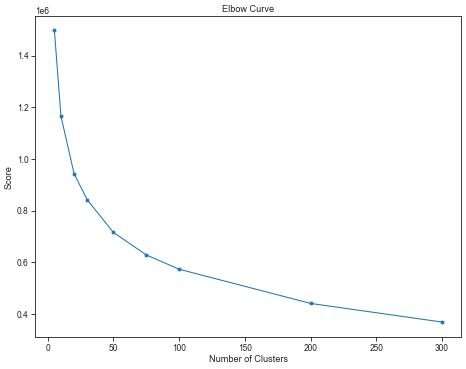

In [108]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()

In [18]:
# ajustar modelo: k-means
from sklearn.cluster import KMeans

X = np.array(dataframe)
kmeans = KMeans(n_clusters=5,n_init=25, random_state=123)
kmeans.fit(X)

centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

# etiquetar los datos con los clusters encontrados
dataframe["cluster"] = clusters
dataframe["cluster"] = dataframe["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids, columns=list(dataframe.columns[:-1]))
centroids_df["cluster"] = [1,2,3,4,5]

### PCA

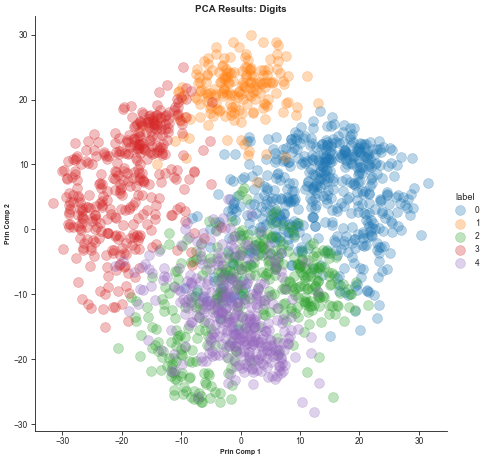

In [19]:
scaler = StandardScaler()

# graficar los datos etiquetados con k-means
from sklearn.decomposition import PCA

pca_num_components = 2
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9','PC10',
              'PC11', 'PC12', 'PC13', 'PC14','PC15', 'PC16', 'PC17', 'PC18','PC19','PC20',
              'PC21', 'PC22', 'PC23', 'PC24','PC25', 'PC26', 'PC27', 'PC28','PC29','PC30',
              'PC31', 'PC32', 'PC33', 'PC34','PC35', 'PC36', 'PC37', 'PC38','PC39','PC40',
              'PC41', 'PC42', 'PC43', 'PC44','PC45', 'PC46', 'PC47', 'PC48','PC49','PC50',
              'PC51', 'PC52', 'PC53', 'PC54','PC55', 'PC56', 'PC57', 'PC58','PC59','PC60',
              'PC61', 'PC62', 'PC63', 'PC64']

# Ejecutamos PCA en los datos y reducimos las dimensiones en dimensiones pca_num_components
reduced_data = PCA(n_components=pca_num_components).fit_transform(dataframe)
results = pd.DataFrame(reduced_data,columns=columns[0:pca_num_components])
results['label'] = dataframe['cluster']

# Establecer estilo de diagrama de dispersión
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Crear diagrama de dispersión del conjunto de datos
sns.lmplot(x='PC1',
           y='PC2',
           data=results,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

### TSNE

In [20]:
dataframe = digits.drop(['target'], axis=1)
# ajustar modelo: k-means
from sklearn.cluster import KMeans

X = np.array(dataframe)
kmeans = KMeans(n_clusters=5,n_init=25, random_state=123)
kmeans.fit(X)

centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

# etiquetar los datos con los clusters encontrados
dataframe["cluster"] = clusters
dataframe["cluster"] = dataframe["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids, columns=list(dataframe.columns[:-1]))
centroids_df["cluster"] = [1,2,3,4,5]

scaler = StandardScaler()

# Aplicamos la metodología TSNE
embedding = TSNE(n_components=2,init='pca',learning_rate='auto')
X_transform = embedding.fit_transform(dataframe)
df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['label'] = dataframe['cluster']

C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


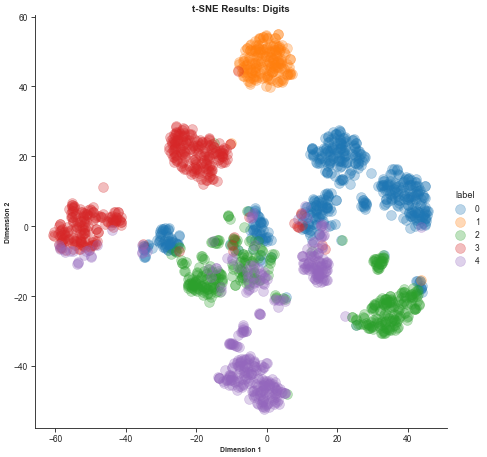

In [21]:
# Graficamos los dígitos TSNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

* Comparando PCA y TSNE, se aprecia que se obtiene un resultado mucho mejor para este último. Apreciandose de mejor manera la separación de los conjuntos de datos en el gráfico.

In [22]:
# Dataframe PCA
results

,PC1,PC2,label
0,2.045469,21.181740,1
1,-8.616009,-20.329915,2
2,-7.291374,-9.610078,2
3,16.157737,2.831721,0
4,-23.079885,5.214060,3
...,...,...,...
1792,15.234600,12.889611,0
1793,-5.672149,20.794344,1
1794,-10.984171,-6.475102,2
1795,5.490258,12.356013,0


In [23]:
# Dataframe TSNE
df_tsne

,_DIM_1_,_DIM_2_,label
0,3.700342,46.779381,1
1,-23.367117,-12.894223,2
2,-14.516751,-4.879564,2
3,35.122520,10.461921,0
4,-49.397392,3.970897,3
...,...,...,...
1792,19.126968,24.189869,0
1793,-3.622571,42.013050,1
1794,-7.467917,-9.881797,2
1795,14.039433,21.349609,0


* Ambos conjuntos de datos reducidos presentan el mismo tamaño. Esto fue realizado a propósito.

In [138]:
# metrics 

import numpy as np 
import pandas as pd

# metrics


def mae(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute error (MAE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.abs(error).mean(), 4)


def mse(targets, predictions) -> float:
    """
    Calculo de la metrica: mean squared error (MSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round((error ** 2).mean(), 4)


def rmse(targets, predictions) -> float:
    """
    Calculo de la metrica: root mean squared error (RMSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.sqrt((error ** 2).mean()), 4)


# b) Percentage errors

def mape(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute percentage error (MAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets

    if any(x == 0 for x in targets):
        return np.inf
    else:
        return round(np.abs(error / targets).mean(),4)


def maape(targets, predictions) -> float:
    """
    Calculo de la metrica:  mean arctangent percentage error  (MAAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """

    error = predictions - targets

    if any((x, y) == (0, 0) for x, y in zip(predictions, targets)):
        return np.inf

    else:
        return round(np.arctan(np.abs(error / targets)).mean(),4)


def wmape(targets, predictions) -> float:
    """
    Calculo de la metrica:  weighted mean absolute percentage error (WMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.sum(targets)

    if sum_values == 0:
        return np.inf
    else:
        return round(np.abs(error).sum() / sum_values,4)


def mmape(targets, predictions) -> float:
    """
    Calculo de la metrica: modified mean absolute percentage error (MMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = np.abs(predictions - targets)
    denom = 1 + np.abs(targets)

    return round(np.mean(error / denom),4)


def smape(targets, predictions) -> float:
    """
    Calculo de la metrica: symmetric mean absolute percentage error (SMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.abs(predictions) + np.abs(targets)

    if any(x == 0 for x in sum_values):
        return np.inf

    else:
        return round(2 * np.mean(np.abs(error) / sum_values),4)
    
def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mae(y_true, y_pred), 4)]
    df_result['mse'] = [round(mse(y_true, y_pred), 4)]
    df_result['rmse'] = [round(rmse(y_true, y_pred), 4)]
    df_result['wmape'] = [round(wmape(y_true, y_pred), 4)]
    df_result['mmape'] = [round(mmape(y_true, y_pred), 4)]

    return df_result

# funcion de reduccion de dimensionalidad y aplicacion de la regresion 

def dr_pipeline(df, model_dr):
    
    # datos
    X = df.drop(columns='target')
    y = df['target']
    
    # reduccion de la dimensionalidad
    embedding = model_dr
    X = embedding.fit_transform(X)
    

    X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
    
    # Creación y entrenamiento del modelo
    modelo = SVC(kernel='poly', C=0.001, gamma= 1)
    modelo.fit(X = X_train, y = y_train)

    
    # Predicciones test
    predicciones = modelo.predict(X=X_test)
    predicciones = predicciones.flatten()

    # Error de test del modelo 
    df_pred = pd.DataFrame({
        'y':y_test,
        'yhat':predicciones
    })

    df_summary = summary_metrics(df_pred)
    
    return df_summary

In [139]:
from sklearn.decomposition import PCA,TruncatedSVD,NMF

modelos_algebra_lineal = [
    ('PCA',PCA(n_components=5)),
    ('SVD',TruncatedSVD(n_components=5)),
    ('NMF',NMF(n_components=5))
]

names = [x[0] for x in modelos_algebra_lineal]
results = [dr_pipeline(digits,x[1]) for x in modelos_algebra_lineal]

C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [140]:
df_algebra_lineal = pd.concat(results).reset_index(drop=True)
df_algebra_lineal['metodo'] =names
df_algebra_lineal

,mae,mse,rmse,wmape,mmape,metodo
0,0.6333,3.3852,1.8399,0.1426,0.1292,PCA
1,0.7167,3.6389,1.9076,0.1614,0.1459,SVD
2,2.0741,10.5593,3.2495,0.4671,0.5930,NMF


### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [208]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_pred = np.array(y_pred)
    y_aux_pred = y_pred[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(16,16))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

### El valor predicho y original son iguales

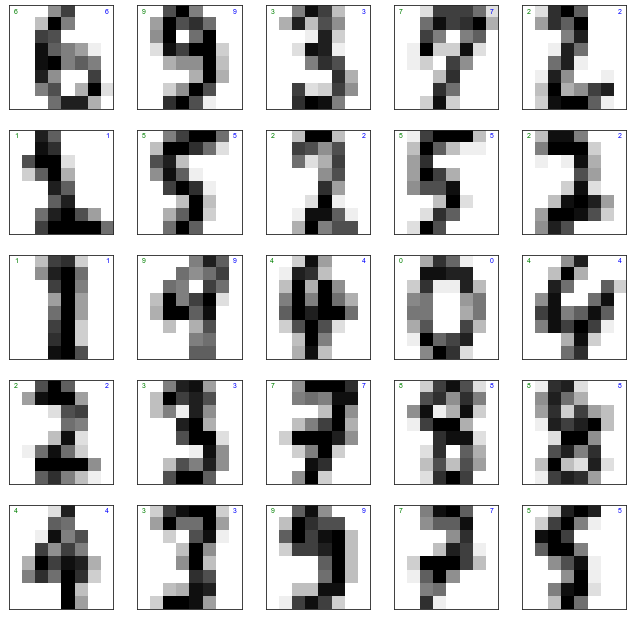

In [209]:
model = SVC(kernel='poly', C=0.001, gamma= 1)
mostar_resultados(digits,model,nx=5, ny=5,label = "correctos")

### El valor predicho y original son distintos

In [218]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_pred = np.array(y_pred)
    y_aux_pred = y_pred[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(1, 5, figsize=(16,16))
    for i in range(nx):
        for j in range(ny):
            index = j 
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[j].get_xaxis().set_visible(False)
            ax[j].get_yaxis().set_visible(False)
    plt.show()

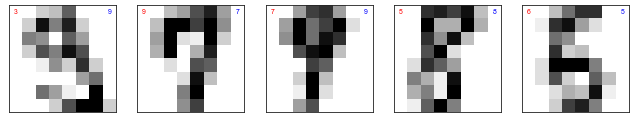

In [219]:
model = SVC(kernel='poly', C=0.001, gamma= 1)
mostar_resultados(digits,model,nx=1, ny=5,label = "incorrectos")

* Finalmente se obtiene que solo números son mal clasificados. Esto puede ser causado por múltiples razónes
    * El modelo no entrega una precisión de 100%, por tanto, era esperable que fallara.
    * La calidad de la imagen es pobre, quizás con mejor resolución sería posible identificar con un 100% de éxito.
    * Al tratarse de número escritos a mano, la forma de estos cambia entre números iguales, lo cuál dificulta la clasificación.
   

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

## II.- California Housing Prices


<img src="https://www.wartsila.com/images/default-source/default-album/california_housing.tmb-1920x690.jpg?sfvrsn=126bc44_1" width="480" height="240" align="center"/>

Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad. 
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo 
    1. Por lo menos debe comparar cuatro modelos
    2. Al menos tres de estos modelos tienen que tener hiperparámetros.
    3. Realizar optimización de hiperparámetros.
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: Puede tomar como referencia lo realizado en la sección **I.- Clasificación de dígitos**. El alumno tiene la libertad de desarrollar un análisis más completo del problema (si así lo desea). Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [2]:
# Se importan paquetes a utilizar

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd 
from PIL import Image
from sklearn.metrics import r2_score
from sklearn import tree, linear_model, ensemble, neighbors

### 1.-

In [3]:
# read data
df = pd.read_csv('data/housing.csv',sep=',')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
nRow, nCol = df.shape
print(f'El conjunto de datos tiene {nRow} filas y {nCol} columnas')

El conjunto de datos tiene 20640 filas y 10 columnas


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


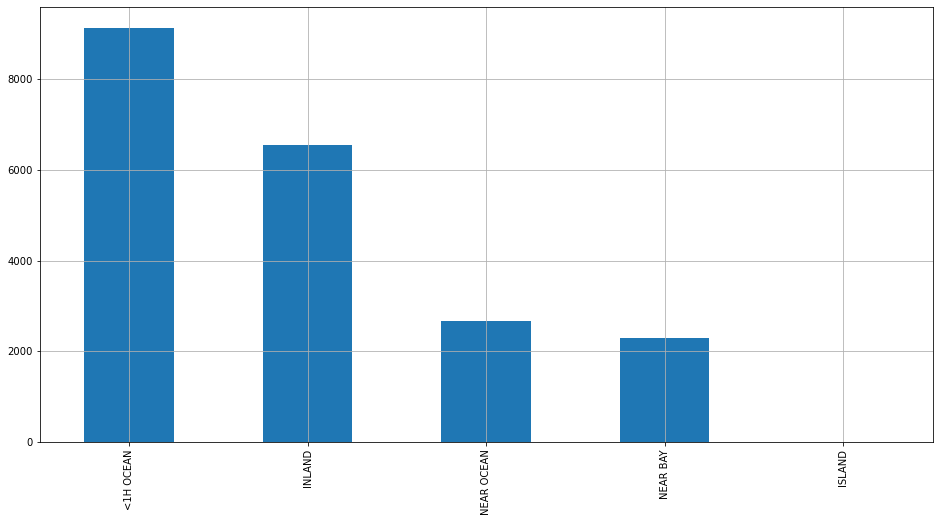

In [7]:
# Gráficos de distribución (gráfico de barras) de datos de columna
plt.figure(figsize=(16, 8))
df["ocean_proximity"].value_counts().plot(kind ="bar")
plt.grid()
plt.show()

### Preprocesamiento de datos
Primero revisaremos si el conjunto de datos presenta valores nulos

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

* Apreciamos que solo el total de camas presenta valores nulos.

In [9]:
df["total_bedrooms"].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

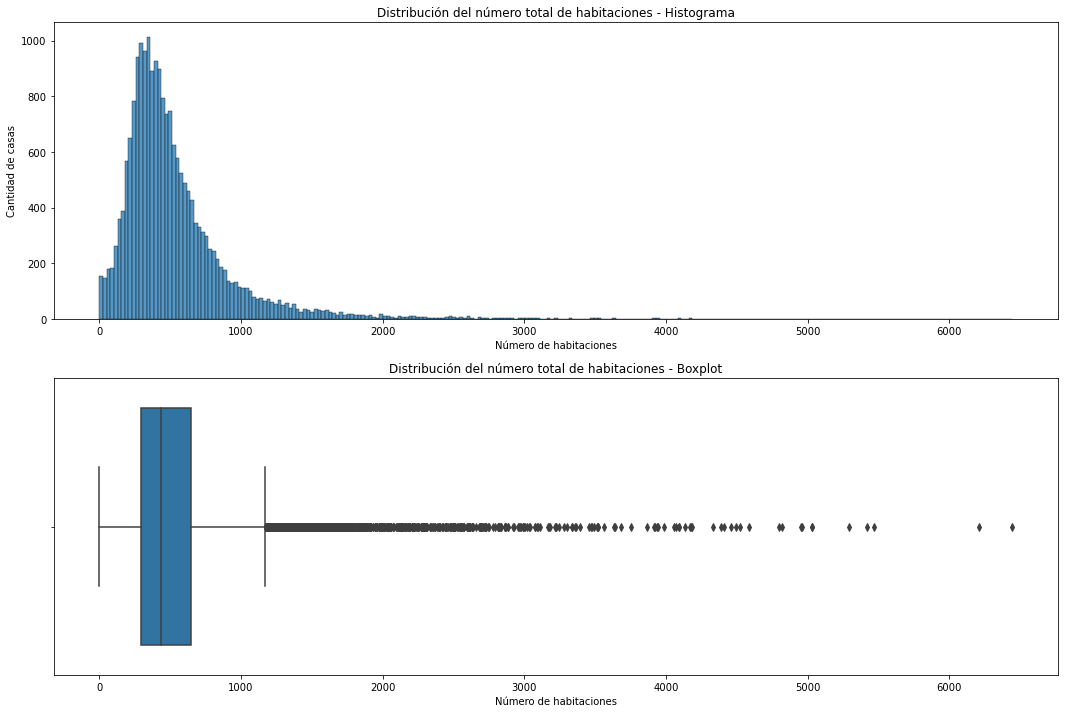

In [10]:
fig, axes = plt.subplots(figsize=(18, 12), nrows=2, ncols=1)

sns.histplot(x = df.total_bedrooms, ax=axes[0])
axes[0].set_title("Distribución del número total de habitaciones - Histograma")
axes[0].set_xlabel('Número de habitaciones')
axes[0].set_ylabel('Cantidad de casas')

sns.boxplot(x = df.total_bedrooms, ax=axes[1])
axes[1].set_title("Distribución del número total de habitaciones - Boxplot")
axes[1].set_xlabel('Número de habitaciones')


plt.show()

* Desde la distribución anterior observamos que los datos de total_bedrooms tiene muchos valores atípicos.
* Es observable que presenta una distribución normal, por lo que podemos usar la media para reemplazar los valores de NaN encontrados previamente.

In [11]:
df["total_bedrooms"] = df["total_bedrooms"].replace(np.nan , df["total_bedrooms"].mean())

* Verificamos nuevamente nuestro conjunto de datos

In [12]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### 2.-

* Revisamos los histogramas de todas las columnas de nuestro set de datos

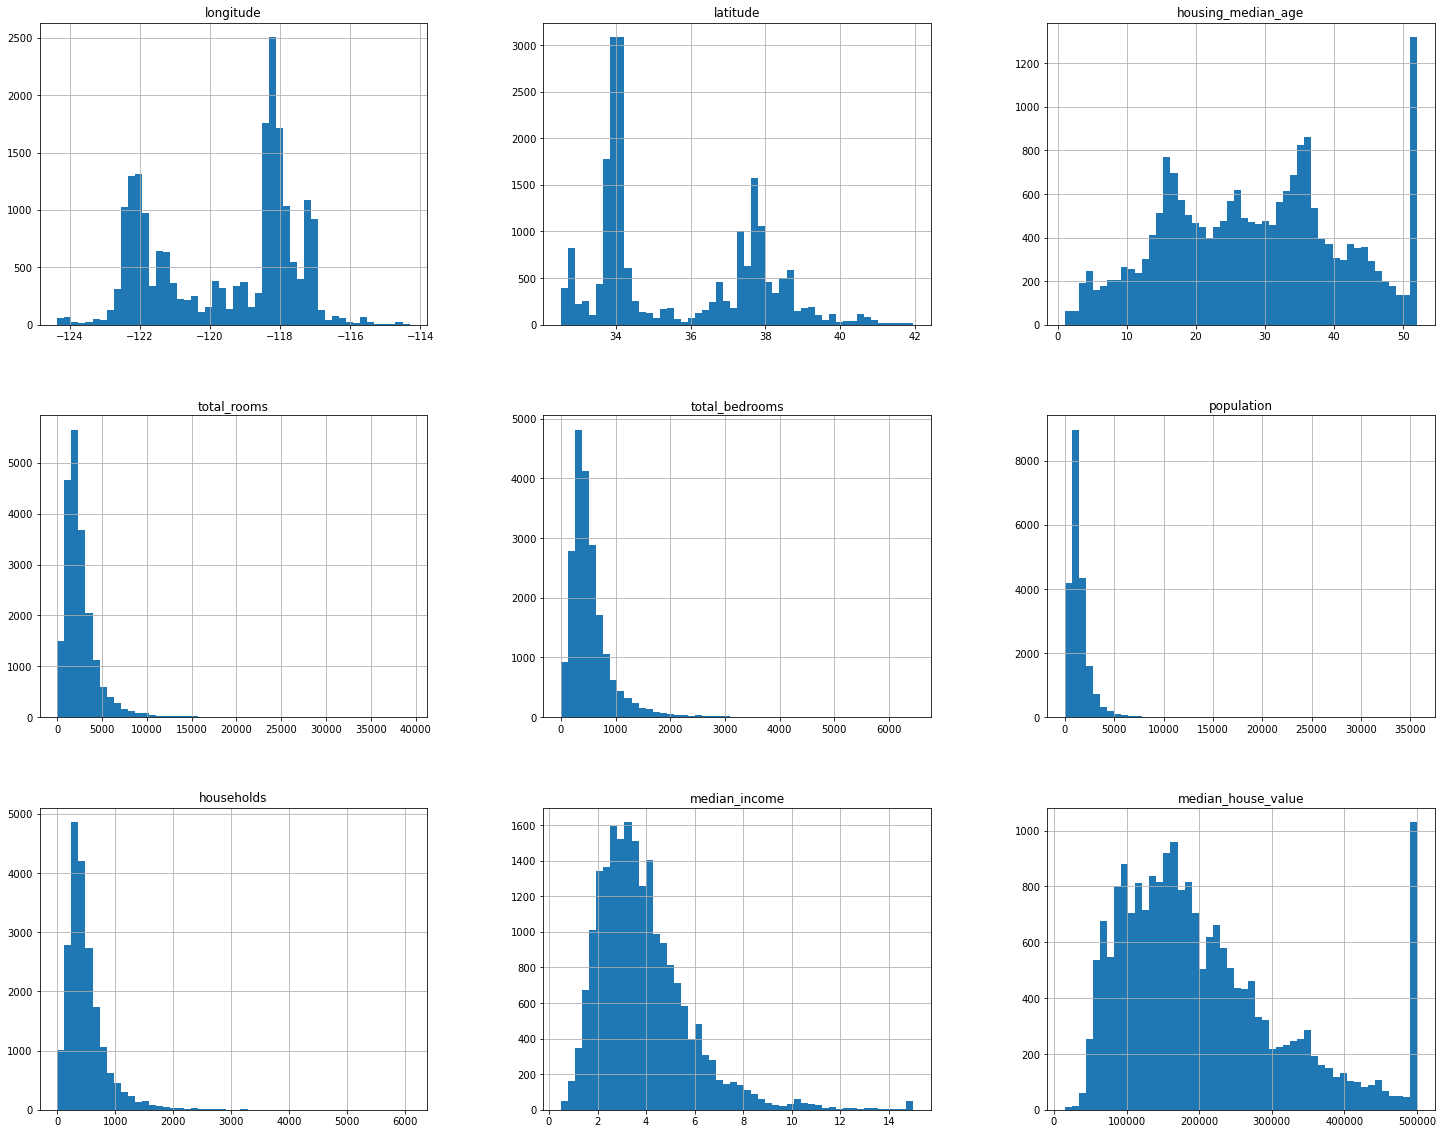

In [13]:
df.hist(bins = 50, figsize= (25,20))
plt.show()

* Se observa que el totam de habitaciones, total de camas, población, hogares, ingreso promedio y valor medio de la vivienda siguen una tendencia de distribución normal. Este último presenta un outliers.

* **Dado que tenemos los datos de latitud y longitud podemos graficar estos y observarlo**
    * los puntos rojos son donde las casas son más caras, los colores más claros son las más baratas
    * los círculos más grandes representan una población más alta.

#### Mapa de calor para encontrar la correlación entre características

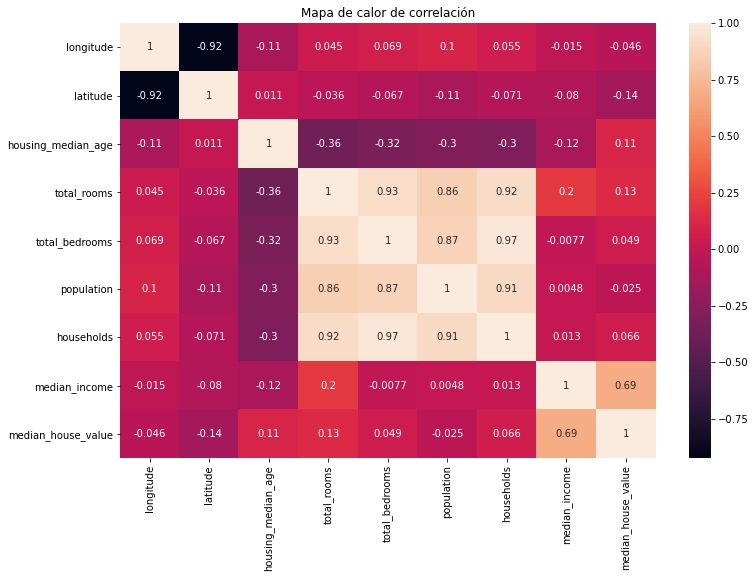

In [14]:
plt.rcParams["figure.figsize"] = (12, 8)
sns.heatmap(df.corr(), annot=True)
plt.title("Mapa de calor de correlación")
plt.show()

* Podemos observar algunas relaciones positivas fuertes entre total_rooms, total_bedrooms, población y hogares.
* También existe una fuerte relación negativa entre latitud y longitud.

### 3.-

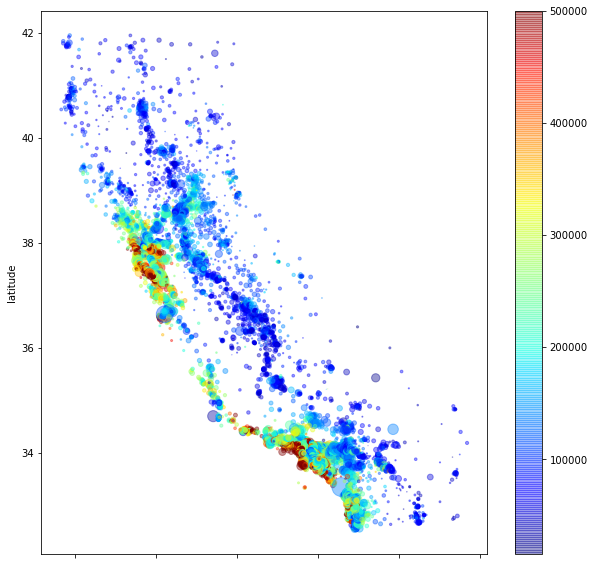

In [15]:
df.plot(kind = "scatter", x="longitude" , y="latitude" , c =df["median_house_value"], s =df["population"]/100,
            alpha = 0.4, cmap = plt.get_cmap("jet"), figsize = (10,10))
plt.show()

In [16]:
def scatter_plots(x_var, y_var):
    fig, axes = plt.subplots(figsize=(20, 8), nrows=1, ncols=3)
    
    ax = 0
    for y in y_var:
        sns.scatterplot(x=x_var, y=y, hue="ocean_proximity", data=df, ax=axes[ax])
        axes[ax].set_title(f"{x_var} vs {y}")

        ax += 1

    plt.show()

**Total de habitaciones frente a otras variables correlacionadas**

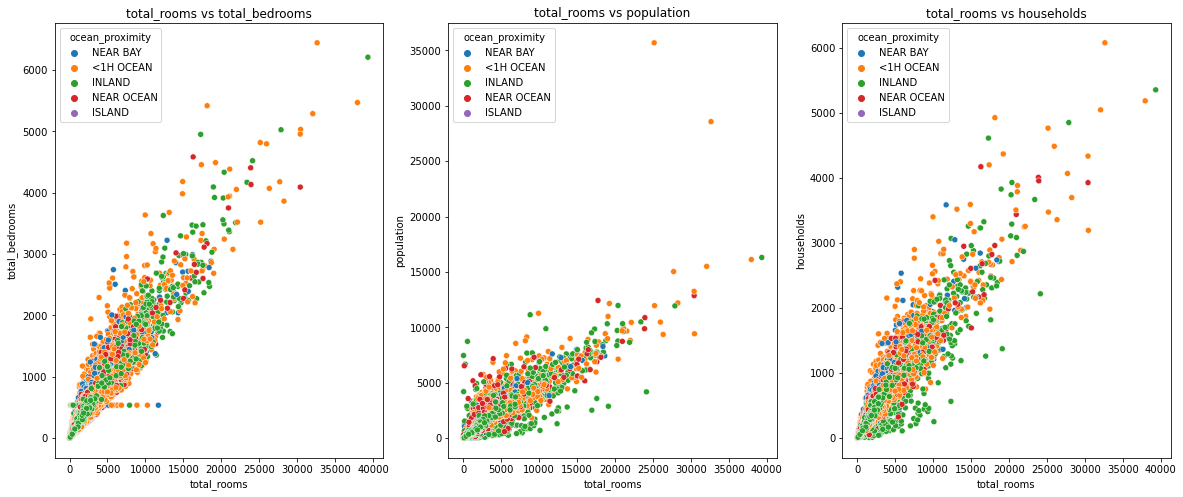

In [17]:
scatter_plots("total_rooms", ["total_bedrooms", "population", "households"])

* En la figura previa podemos observar una relación lineal positiva

### 4.-

**Codificación de variable categórica**

In [18]:
new_data = pd.get_dummies(df)
new_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


**Separar los datos en los conjuntos de entrenamiento y testeo**

In [19]:
X = new_data.drop("median_house_value", axis=1)
y = new_data.median_house_value.values.reshape(-1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [20]:
MLA_compare = pd.DataFrame()

def MLA_testing(MLA, X_train, X_test):
    row_index = 0
    for classifier in MLA:
        #y_train = 
        classifier.fit(X_train, np.array(y_train.ravel()).astype(int))

        y_pred = classifier.predict(X_test)
        classifier_r2_score = r2_score(y_test, y_pred)

        MLA_name = classifier.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'R^2 Score'] = classifier_r2_score*100

        print(MLA_name, "Done")
        row_index+=1

In [21]:
MLA = [
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor(),
    
    linear_model.LinearRegression(),
    linear_model.SGDRegressor(),
    
    ensemble.RandomForestRegressor(),
    ensemble.AdaBoostRegressor(),
    ensemble.ExtraTreesRegressor(),
    ensemble.GradientBoostingRegressor(),
    
    neighbors.KNeighborsRegressor(),
]

MLA_testing(MLA=MLA, X_train=X_train, X_test=X_test)

DecisionTreeRegressor Done
ExtraTreeRegressor Done
LinearRegression Done
SGDRegressor Done
RandomForestRegressor Done
AdaBoostRegressor Done
ExtraTreesRegressor Done
GradientBoostingRegressor Done
KNeighborsRegressor Done


In [22]:
MLA_compare = MLA_compare.sort_values(by="R^2 Score", ascending=False).reset_index(drop=True)[:8]
MLA_compare

,MLA Name,R^2 Score
0,RandomForestRegressor,82.278364
1,ExtraTreesRegressor,79.500634
2,GradientBoostingRegressor,76.721932
3,LinearRegression,63.816180
4,DecisionTreeRegressor,63.813652
5,ExtraTreeRegressor,54.068986
6,AdaBoostRegressor,32.669251
7,KNeighborsRegressor,24.312675


* Como se aprecia en la tabla comparativa, el mejor modelo de los considerados el Random Forest.
* Se seleccionan los 3 primeros de esta lista para realizar la optimización de sus hiperparámetros

**Random Forest Regressor**

In [23]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [100],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)
    
    y_pred = grid.predict(X_test)
    grid_r2_score = r2_score(y_test, y_pred)

    return grid_r2_score , grid.best_params_

In [24]:
best_score, best_params = Grid_Search_CV_RFR(X_train, np.array(y_train.ravel()).astype(int))
print('score')
print(best_score)
print('')
print('Params')
print(best_params)

score
0.8236303253508124

Params
{'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 100}


**Extra Trees Regressor**

In [25]:
def Grid_Search_CV_ETR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import ExtraTreesRegressor

    estimator = ExtraTreesRegressor()
    param_grid = { 
            "n_estimators"      : [100],
            "criterion"         : ["squared_error", "absolute_error"],
            #"max_depth"         : [10],
            "max_features"      : ["auto", "sqrt", "log2"]
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)
    
    y_pred = grid.predict(X_test)
    grid_r2_score = r2_score(y_test, y_pred)

    return grid_r2_score , grid.best_params_

In [26]:
best_score2, best_params2 = Grid_Search_CV_ETR(X_train, np.array(y_train.ravel()).astype(int))
print('score')
print(best_score2)
print('')
print('Params')
print(best_params2)

score
0.8109891494939304

Params
{'criterion': 'squared_error', 'max_features': 'sqrt', 'n_estimators': 100}


**Gradient Boosting Regressor**

In [27]:
def Grid_Search_CV_GBR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import GradientBoostingRegressor

    estimator = GradientBoostingRegressor()
    param_grid = { 
            "loss"              : ["squared_error", "absolute_error", "huber", "quantile"],
            "n_estimators"      : [100],
            "criterion"         : ["friedman_mse", "squared_error", "mse", "mae"],
            #"max_depth"         : [10],
            "max_features"      : ["auto", "sqrt", "log2"]
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)
    
    y_pred = grid.predict(X_test)
    grid_r2_score = r2_score(y_test, y_pred)

    return grid_r2_score , grid.best_params_

In [28]:
best_score3, best_params3 = Grid_Search_CV_GBR(X_train, np.array(y_train.ravel()).astype(int))
print('score')
print(best_score3)
print('')
print('Params')
print(best_params3)

score
0.7672193205304274

Params
{'criterion': 'friedman_mse', 'loss': 'squared_error', 'max_features': 'auto', 'n_estimators': 100}


### 5.-

**Primero, mostraremos los resultados para los modelos sin hiperparámetros.**

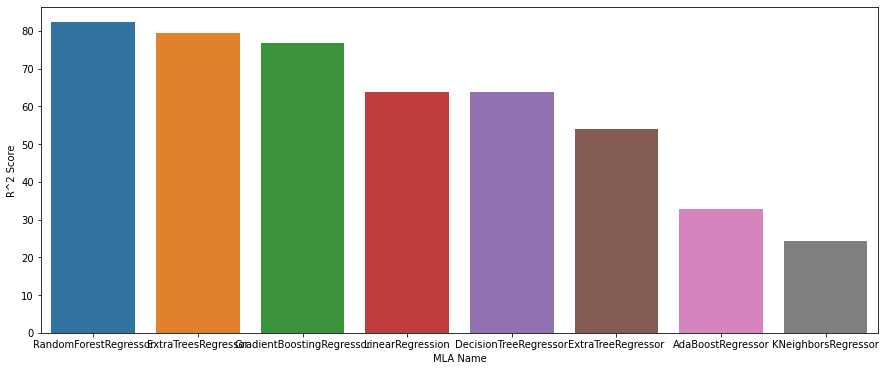

In [29]:
plt.rcParams["figure.figsize"] = (15, 6)
sns.barplot(x="MLA Name", y="R^2 Score",data=MLA_compare)
plt.show("Comparing R^2 scores of Models")
plt.show()

In [35]:
results = pd.DataFrame()
results['Model'] = ['Random Forest Regressor', 'Extra Trees Regressor', 'Gradient Boosting Regressor']
results['R2 Score'] = [best_score*100, best_score2*100, best_score3*100]
results['Paremeters'] = [best_params,best_params2,best_params3]
results

,Model,R2 Score,Paremeters
0,Random Forest Regressor,82.363033,"{'bootstrap': False, 'max_features': 'log2', '..."
1,Extra Trees Regressor,81.098915,"{'criterion': 'squared_error', 'max_features':..."
2,Gradient Boosting Regressor,76.721932,"{'criterion': 'friedman_mse', 'loss': 'squared..."


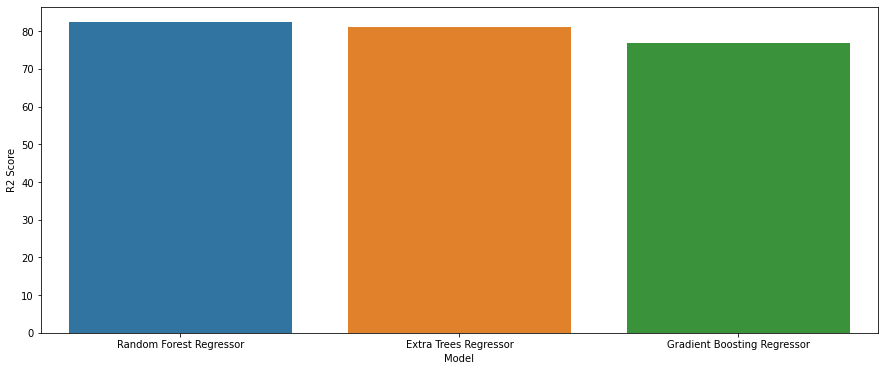

In [38]:
plt.rcParams["figure.figsize"] = (15, 6)
sns.barplot(x="Model", y="R2 Score",data=results)
plt.show("Comparing R^2 scores of Models")
plt.show()

In [41]:
Final = pd.concat([MLA_compare[:3], results], axis=1)
Final

,MLA Name,R^2 Score,Model,R2 Score,Paremeters
0,RandomForestRegressor,82.278364,Random Forest Regressor,82.363033,"{'bootstrap': False, 'max_features': 'log2', '..."
1,ExtraTreesRegressor,79.500634,Extra Trees Regressor,81.098915,"{'criterion': 'squared_error', 'max_features':..."
2,GradientBoostingRegressor,76.721932,Gradient Boosting Regressor,76.721932,"{'criterion': 'friedman_mse', 'loss': 'squared..."


### 6.-

* De los 9 modelos utilizados inicialmente (DecisionTreeRegressor(), ExtraTreeRegressor(), LinearRegression(), SGDRegressor(), RandomForestRegressor(), AdaBoostRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor(), KNeighborsRegressor()), Se selecionaron los cuáles entregaron un mejor score r2. Estos fueron Random Forest Regressor, Extra Trees Regressor y Gradient Boosting Regressor.
* En base a los 3 modelos trabajados con hiperparámetros podemos concluir que:
    * Se logró una mejora en cuanto al parámetros r2 score para los modelos Random Forest Regressor y Extra Trees Regressor. En el caso del modelo Gradient Boosting Regressor, el parámetros r2 permaneció invariante.
    * El modelo con mejor desempeño fue, Random Forest Regressor con parámetros {'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 100}